# Simulating Edelweiss Data

The purpose of this notebook is to use the Edelweiss 2004 paper to extract a nuclear recoil Fano factor, and then use that in order to simulate data that should be comparable to the data presented in that paper. 

## Uncorrelated $E_I$ and $E_H$ with Truncated Expansion

First I start with the simplest case, where the $E_I$ and $E_H$ have uncorrelated gaussian errors and the expansion for the quenching random variable is assumed to truncate after the first two terms. 

\begin{equation}
\sigma_Q^2 = \left(\frac{dQ}{dE_I}\right)^2 \sigma_I^2 + \left(\frac{dQ}{dE_H}\right)^2 \sigma_H^2
\end{equation}

In this case if there is an "extra" Fano factor for nuclear recoils it would cause the $\sigma_Q$ to be larger, call it $\tilde{\sigma}_Q$. 

\begin{equation}
\tilde{\sigma}_Q^2 = \sigma_Q^2 + \left\{\frac{\epsilon}{E_R} \langle Q \rangle + \frac{2V}{E_R} \langle Q \rangle^2 + \frac{2V^2}{\epsilon E_R} \langle Q \rangle^2 \right\} F,
\end{equation}

where $F$ is the Fano factor for nuclear recoils. Further, the paper takes:

\begin{equation*}
  \langle Q \rangle = aE_R^b = 0.16E_R^{0.18},
\end{equation*}

and also acknowledges that the NR band needs to be wider; a fact they address by using a constant widening, $C$, so that:

\begin{equation}
\tilde{\sigma}_Q^2 = \sigma_Q^2 + C^2
\end{equation}

In [1]:
#let's create the F(Er,C;a,b) function
C = 0.035 #from Edw. paper
a = 0.16
b = 0.16
eps = 3.3 #eV
V = 4 #voltage in Volts

#take x in keV
F = lambda x: C**2/(((eps/1000)*a/(x**(1-b)))  + \
                   (2*(V/1000)*a**2/(x**(1-2*b))) + \
                   (2*(V/1000)**2*a**3/((eps/1000)*x**(1-3*b))) )

print(F(100))

import numpy as np
Fv = np.vectorize(F)

51.920586307776425


In [2]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

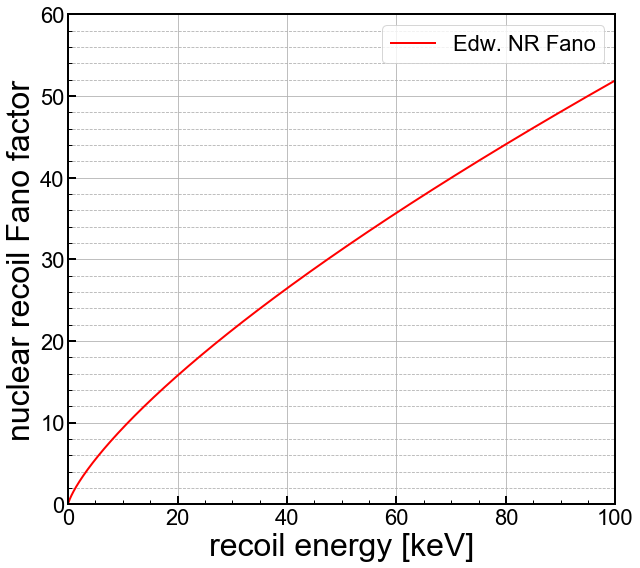

In [3]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


X = np.arange(0.1,100,0.1)

ax1.plot(X,Fv(X),'r-',label='Edw. NR Fano')





#ax1.axvline(t(t_test[idx]), color='k', linestyle='-', lw=2, alpha=0.8,label=None)


ymin = 0
ymax = 60



ax1.set_yscale('linear')
#ax1.set_yscale('linear')
ax1.set_xlim(0, 100) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('nuclear recoil Fano factor',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/Edw_Fano_v1.png')
plt.show()

In [4]:
# now generate Edw. EI and EH values, then construct Q and ER

#first need the Edw. resolutions: taken from Amy's nrFano_Constraint/Edelweiss_data/Edelweiss_resolution_calculations.ipynb
sig0 = 0.4
sig122 = 3.5
aH = np.sqrt((sig122**2 - sig0**2)/122**2)
sigH = lambda x: np.sqrt(sig0**2 + (aH*x)**2)

print(sigH(10))

0.49114983912439203
